# Logistic Regression

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

 Load the Data Set

In [5]:
claimants = pd.read_csv(r"D:\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


The drop method in pandas is used to remove specified labels from rows or columns of a DataFrame. Here’s a brief explanation of the parameters used in your command:
<br><br>
CASENUM: This specifies the label of the column to be dropped. In this case, the column named "CASENUM" will be removed.
<br><br>
inplace=True: This parameter indicates that the operation should modify the original DataFrame directly rather than returning a new one. If set to False, a new DataFrame with the specified column removed would be returned instead .
<br><br>
axis=1: This specifies that the operation should be applied along the columns. If it were set to axis=0, it would indicate that rows should be dropped instead .

In [7]:
claimants.drop(["CASENUM"], inplace=True, axis=1)

In [8]:
claimants.shape

(1340, 6)

In [9]:
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [10]:
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [11]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


Logistic regression and fit the model

In [13]:
classifier = LogisticRegression()
classifier.fit(X, Y)

LogisticRegression()

Predict for X datasetabs

In [15]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [17]:
import os
try:
    y_pred_df.to_csv("logistic_results.csv")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Current working directory:", os.getcwd())
os.getcwd()

'C:\\Users\\Gowtham'

Confusion Matrix for the model accuracy

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


((381+395)/(381+197+123+395))*100

In [21]:
N = 381+197+123+395
tp = 381
fp = 197
fn = 123
tn = 395
accuracy = ( tn + tp ) / N
accuracy

0.708029197080292

snes calculates the sensitivity (true positive rate), which is the ratio of true positives (TP) to the total actual positives (TP + FN).<br>
spec calculates the specificity, which is the ratio of true negatives (TN) to the total actual negatives (TP + FP).

In [23]:
snes = tp / (tp + fn)
spec = tn / (tp + fp)
print(snes,spec,sep="\n")

0.7559523809523809
0.6833910034602076


Precision - Tell us about when it predict yes, how often it is correct<br><br>
Recall - Gives us as idea about when its accuracy yes how often does it predict yes<br><br>
F1 score - harmonic mean of precision and recall<br><br>
In recall - it has sensitivity (classified as 1) and specifity(classified as 0)

In [25]:
precision = tp / (tp+fp)
accuracy = (tp+tn) / N
recall = tp / (tp+fn)

In [26]:
print(precision,accuracy,recall,sep='\n')

0.6591695501730104
0.708029197080292
0.7559523809523809


classification report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



ROC Curve - Receiver Operative Charasteristics Curve <br><br>
A: TPR = 1, FPR - 0, Ideal Model Classifier<br>
B: TPR = 0, FPR = 1, Worst Classifier<br>
C: TPR = FPR = 0 , Conservative Classifier<br>
D: TPR = FPR = 1 , Ultra Liberal Classifier

0.7108589063606365


Text(0, 0.5, 'True Positive Rate')

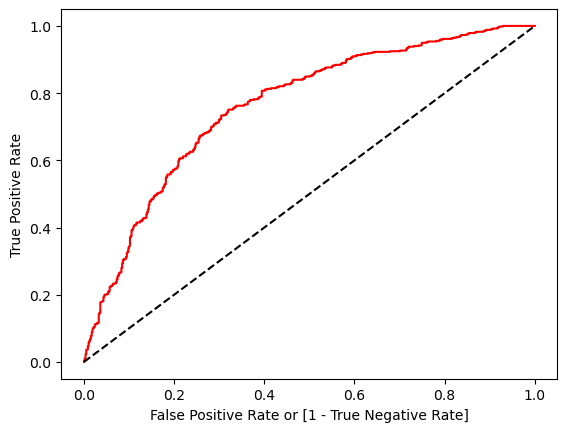

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
acu = roc_auc_score(Y, y_pred)
print(acu)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model ( area = %0.2f )'%acu)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Support Vector Model using Python Sklearn

In [32]:
# library load & read input file
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# iris

In [33]:
# checking columns name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
# checking iris tab button option 
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
# Conventing in to df
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Adding column to iris df
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [39]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [40]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# Adding target column to df
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [42]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [43]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [44]:
import matplotlib.pyplot as pyplot
%matplotlib inline

Sepal length vs Sepal Width (Setosa vs Versicolor)

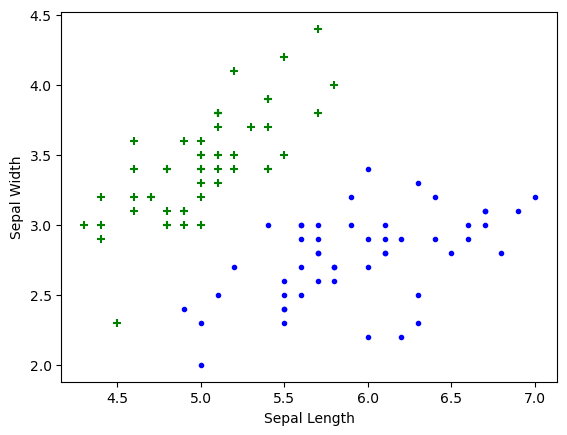

In [46]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue',marker='.')

Train Using Support Vector Machine (SVM)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
len(X_train)

120

In [52]:
len(X_test)

30

#### Model Fit & Validation

In [54]:
from sklearn.svm import SVC 
model = SVC()

In [55]:
model.fit(X_train, y_train)

SVC()

In [56]:
model.score(X_test, y_test)

1.0

In [57]:
#model prediction
model.predict([[13,15,11,12]])

C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.datasets import load_iris
<br>iris = load_iris()<br>
import some data to play with

In [60]:
iris = pd.read_csv(r'D:\iris.csv',index_col=0)

In [61]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Complete Iris dataset

In [63]:
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [64]:
x = iris.iloc[:,0:4]
y = iris['Species']

In [65]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [66]:
y.unique()

array([0, 1, 2])

In [67]:
iris['Species'].unique()

array([0, 1, 2])

In [68]:
iris.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [69]:
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Splitting data into training and testing data set

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [72]:
len(x_train) , len(x_test)

(120, 30)

#### Building Decision Tree Classifier using Entropy Criteria

In [74]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Plot the desision tree

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

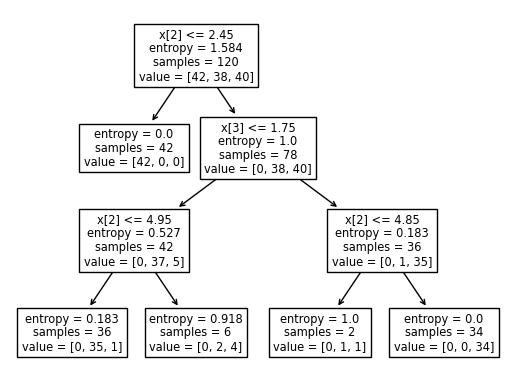

In [76]:
from sklearn import tree
tree.plot_tree(model)

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

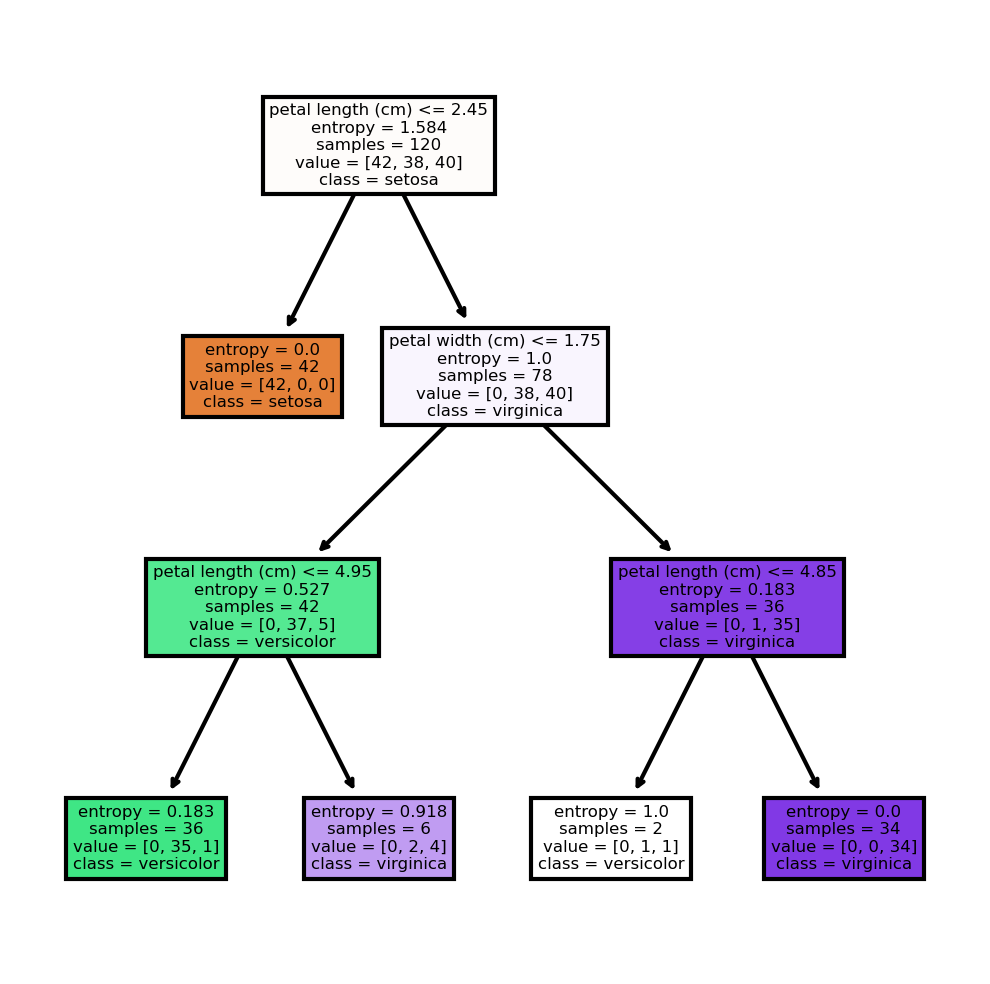

In [77]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [80]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [81]:
pred = model.predict(x_test)
np.mean(pred==y_test)

0.9666666666666667

<h2 align='center'>Ensemble Learning: Bagging Tutorial</h2>

**We will use pima indian diabetes dataset to predict if a person has a diabetes or not based on certain features such as blood pressure, skin thickness, age etc. We will train a standalone model first and then use bagging ensemble technique to check how it can improve the performance of the model**

In [84]:
import pandas as pd

df = pd.read_csv(r"D:\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There is slight imbalance in our dataset but since it is not major we will not worry about it!

<h3>Train test split</h3>

In [90]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                        stratify=y, random_state=10)

In [93]:
X_train.shape

(576, 8)

In [94]:
X_test.shape

(192, 8)

In [95]:
y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [96]:
201/375

0.536

In [97]:
y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [98]:
67/125

0.536

<h3>Train using stand alone model</h3>

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.71428571, 0.67532468, 0.66233766, 0.77777778, 0.73856209])

In [101]:
scores.mean()

0.7136575842458195

<h3>Train using Bagging</h3>

In [103]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7534722222222222

In [104]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [105]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gowtham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [106]:
scores.mean()

0.7578728461081402

We can see some improvement in test score with bagging classifier as compared to a standalone classifier

<h3>Train using Random Forest</h3>

In [109]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.7682879212290977

In [110]:
scores

array([0.78571429, 0.72077922, 0.75324675, 0.82352941, 0.75816993])